In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x = np.linspace(0,30,20)
y = x + 3*np.random.randn(20)

In [5]:
x

array([ 0.        ,  1.57894737,  3.15789474,  4.73684211,  6.31578947,
        7.89473684,  9.47368421, 11.05263158, 12.63157895, 14.21052632,
       15.78947368, 17.36842105, 18.94736842, 20.52631579, 22.10526316,
       23.68421053, 25.26315789, 26.84210526, 28.42105263, 30.        ])

In [6]:
y

array([ 2.6844313 ,  1.28056793, -1.1577059 , 11.06246679,  7.81541756,
        9.38007503,  9.4664446 ,  4.82381874, 10.48489779, 10.87430035,
       14.25798235, 19.8684498 , 22.76958514, 22.06850152, 25.09763422,
       24.78744791, 25.92450483, 29.91778307, 29.04350298, 27.86164251])

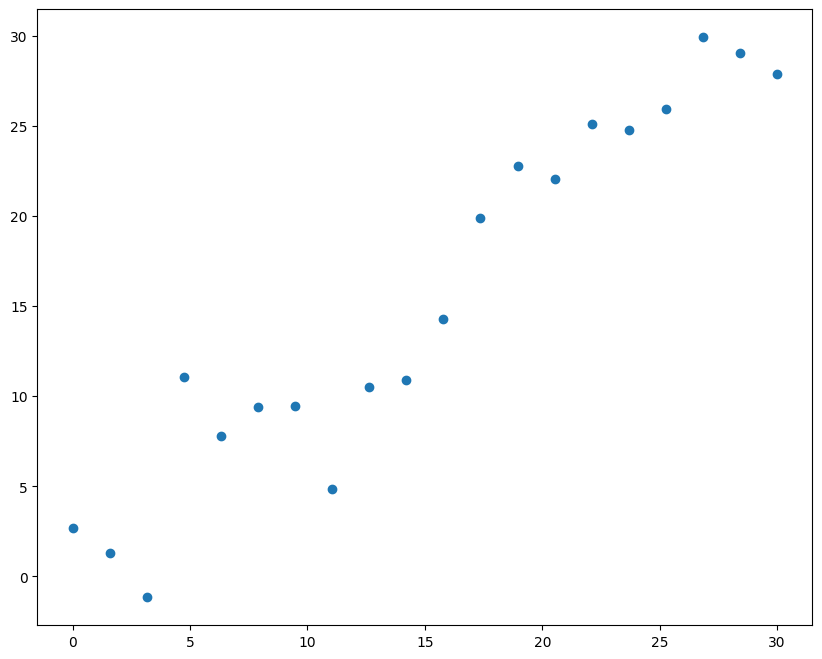

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(x,y)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
x

array([ 0.        ,  1.57894737,  3.15789474,  4.73684211,  6.31578947,
        7.89473684,  9.47368421, 11.05263158, 12.63157895, 14.21052632,
       15.78947368, 17.36842105, 18.94736842, 20.52631579, 22.10526316,
       23.68421053, 25.26315789, 26.84210526, 28.42105263, 30.        ])

In [13]:
y

array([ 2.6844313 ,  1.28056793, -1.1577059 , 11.06246679,  7.81541756,
        9.38007503,  9.4664446 ,  4.82381874, 10.48489779, 10.87430035,
       14.25798235, 19.8684498 , 22.76958514, 22.06850152, 25.09763422,
       24.78744791, 25.92450483, 29.91778307, 29.04350298, 27.86164251])

In [14]:
X = x.reshape(-1, 1)  # 变成一个个的向量

In [18]:
X

array([[ 0.        ],
       [ 1.57894737],
       [ 3.15789474],
       [ 4.73684211],
       [ 6.31578947],
       [ 7.89473684],
       [ 9.47368421],
       [11.05263158],
       [12.63157895],
       [14.21052632],
       [15.78947368],
       [17.36842105],
       [18.94736842],
       [20.52631579],
       [22.10526316],
       [23.68421053],
       [25.26315789],
       [26.84210526],
       [28.42105263],
       [30.        ]])

In [15]:
Y = y.reshape(-1, 1)

In [17]:
model.fit(X,Y)

LinearRegression()

In [19]:
model.predict([[40]])

array([[40.97872639]])

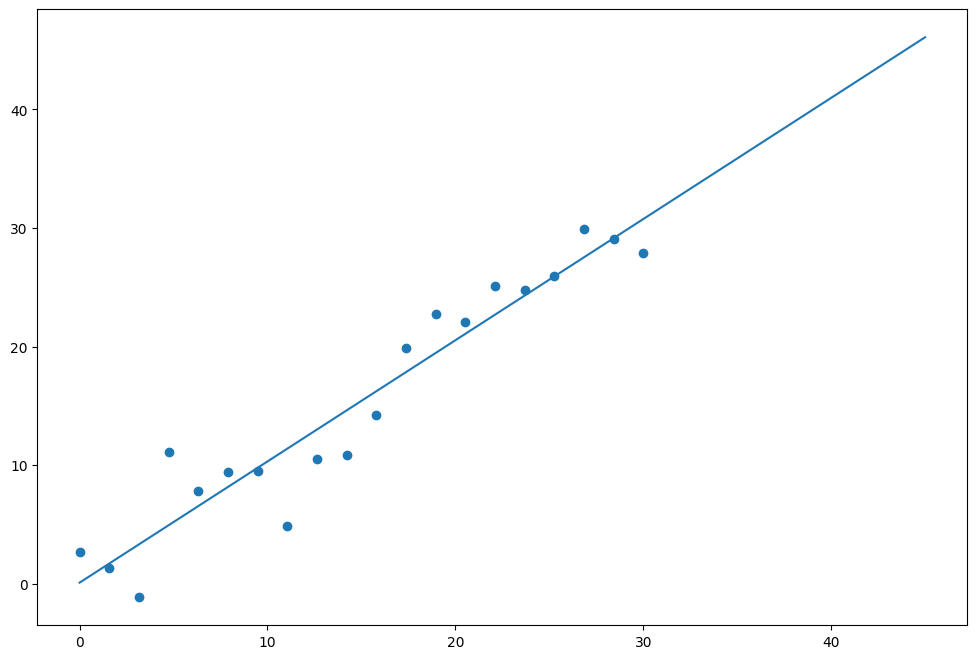

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(x,y)
x1 = np.linspace(0,45).reshape(-1,1)
plt.plot(x1, model.predict(x1))

In [22]:
X

array([[ 0.        ],
       [ 1.57894737],
       [ 3.15789474],
       [ 4.73684211],
       [ 6.31578947],
       [ 7.89473684],
       [ 9.47368421],
       [11.05263158],
       [12.63157895],
       [14.21052632],
       [15.78947368],
       [17.36842105],
       [18.94736842],
       [20.52631579],
       [22.10526316],
       [23.68421053],
       [25.26315789],
       [26.84210526],
       [28.42105263],
       [30.        ]])

In [23]:
Y

array([[ 2.6844313 ],
       [ 1.28056793],
       [-1.1577059 ],
       [11.06246679],
       [ 7.81541756],
       [ 9.38007503],
       [ 9.4664446 ],
       [ 4.82381874],
       [10.48489779],
       [10.87430035],
       [14.25798235],
       [19.8684498 ],
       [22.76958514],
       [22.06850152],
       [25.09763422],
       [24.78744791],
       [25.92450483],
       [29.91778307],
       [29.04350298],
       [27.86164251]])

In [26]:
Y_PRE = model.predict(X)

In [29]:
np.sum(np.square(Y_PRE - Y))

171.24147754851296

In [30]:
model.intercept_  # 截距

array([0.07770405])

In [31]:
model.coef_  # 斜率

array([[1.02252556]])

In [32]:
Y_PRE2 = (model.coef_ + 0.1)*X+ model.intercept_

In [33]:
np.sum(np.square(Y_PRE2 - Y))

232.82042491693403

# 客观的评价模型

In [41]:
X_train, X_test = X[:10], X[10:]
Y_train, Y_test = Y[:10], Y[10:]

In [42]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [44]:
np.sum(np.square(model.predict(X_test)-Y_test))

609.1213719722114

In [45]:
Y_PRE3 = model.coef_*X_test + model.intercept_ + 0.1

In [46]:
np.sum(np.square(Y_PRE3-Y_test))  # test 的点都在上面，数据集较小

594.2234951674719

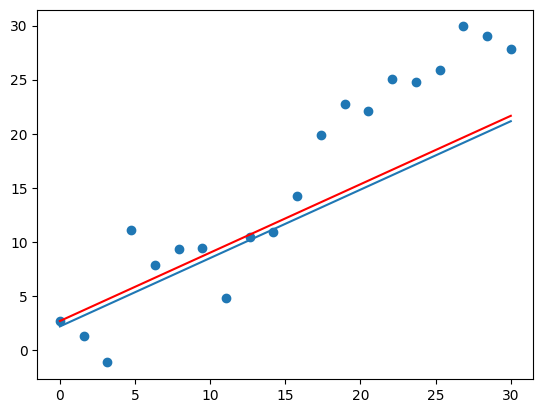

In [51]:
plt.scatter(X,Y)
plt.plot(X, model.predict(X))
plt.plot(X, model.coef_*X + model.intercept_ + 0.5, color='r')